# Convolutional Neural Network
##### MNIST - Hand Written Digits

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout,BatchNormalization,Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.python.client import device_lib

<hr>

### Loading Data

In [2]:
((train_images,train_label),(test_images,test_label)) = mnist.load_data()
train_images = train_images.reshape((60000,28,28,1)) / 255.
test_images = test_images.reshape((10000,28,28,1)) / 255.
test_label = to_categorical(y=test_label,num_classes=10)
train_label = to_categorical(y=train_label,num_classes=10)

<hr>

### Create Model

In [3]:
input_shape = train_images.shape[1:]

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy, optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
activation (Activation)      (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

<hr>

### Training Model

In [ ]:
hist = model.fit(x=train_images,y=train_label, validation_data=(test_images,test_label), batch_size=256, epochs=50)

Epoch 1/50
116/235 [=============>................] - ETA: 55s - loss: 0.9221 - accuracy: 0.7069 

<hr>

### Plot resualt

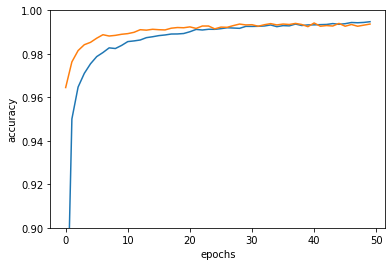

In [20]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'test')
plt.ylim(0.9,1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

<hr>

### Evaluating Model

In [11]:
model.evaluate(x=test_images, y=test_label)

313/313 [==============================] - 2s 6ms/step - loss: 0.0196 - accuracy: 0.9937


[0.01958615519106388, 0.9937000274658203]